Pandas and matplotlib together

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('D:\\Python freeCodeCamp\\From (1.11.35) Why Python\\covid_19_data.csv')

In [4]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [7]:
df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [15]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
#sob null object k non null korche

In [12]:
df2

,Date,State,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
4242,2020-03-08,Northern Territory,Australia,0.0,0.0,0.0
4243,2020-03-08,"Lackland, TX (From Diamond Princess)",US,0.0,0.0,0.0
4244,2020-03-08,"Montgomery County, TX",US,0.0,0.0,0.0
4245,2020-03-08,"Omaha, NE (From Diamond Princess)",US,0.0,0.0,0.0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4247 entries, 0 to 4246
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4247 non-null   datetime64[ns]
 1   State      4247 non-null   object        
 2   Country    4247 non-null   object        
 3   Confirmed  4247 non-null   object        
 4   Deaths     4247 non-null   object        
 5   Recovered  4247 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 199.2+ KB


In [17]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [18]:
df3.head()

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-02-25,1.0,0.0,0.0
3,Afghanistan,2020-02-26,1.0,0.0,0.0
4,Afghanistan,2020-02-27,1.0,0.0,0.0


In [19]:
countries = df3['Country'].unique()
len(countries)


111

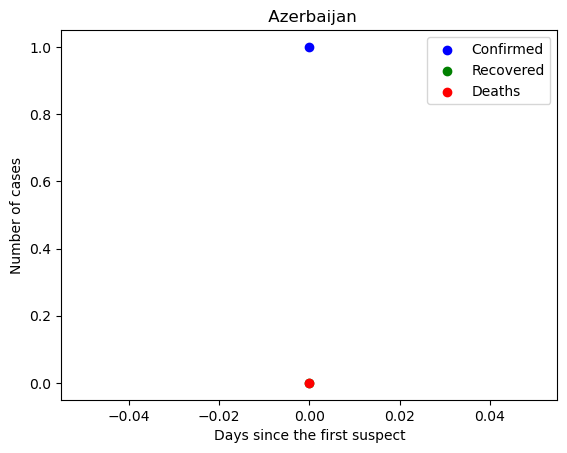

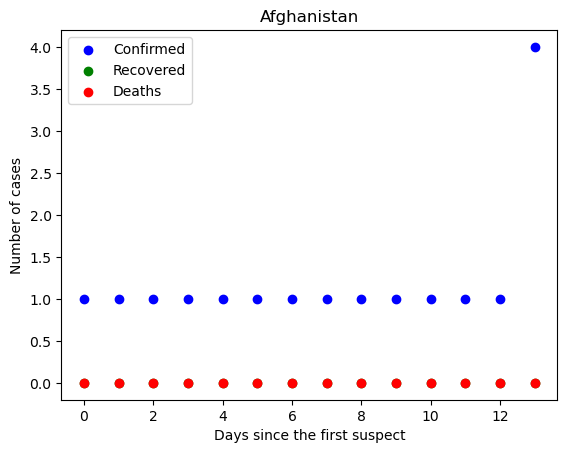

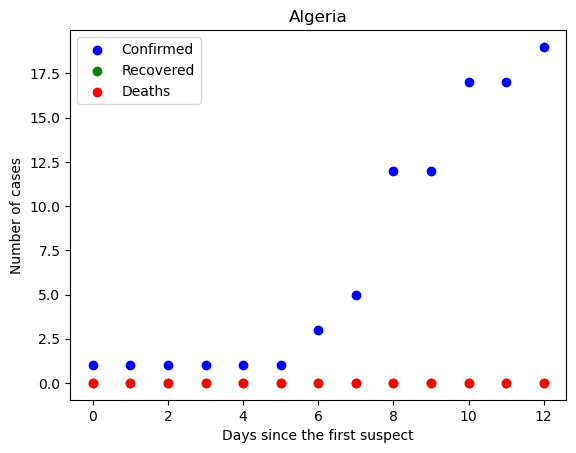

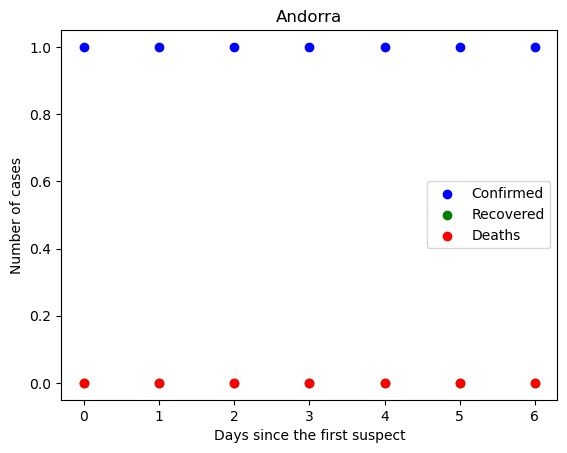

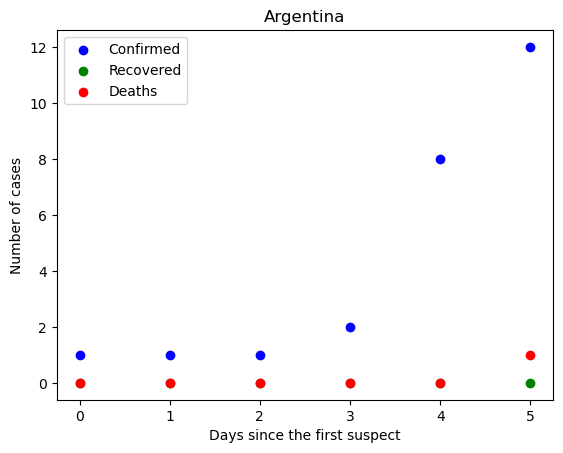

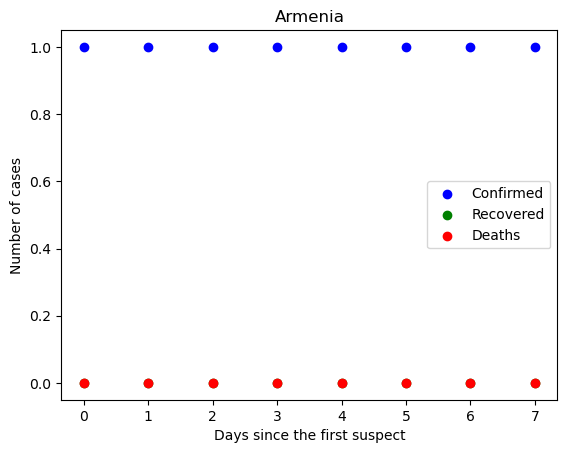

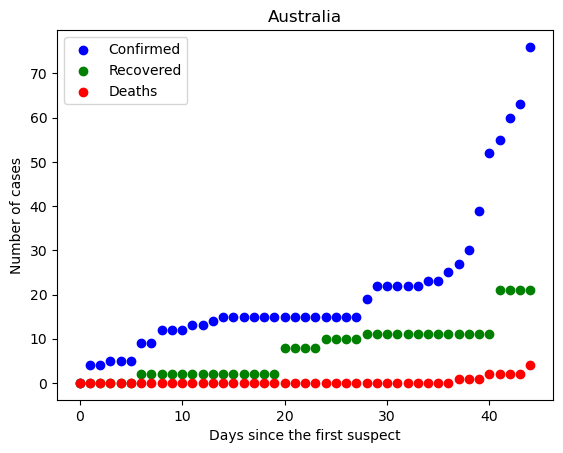

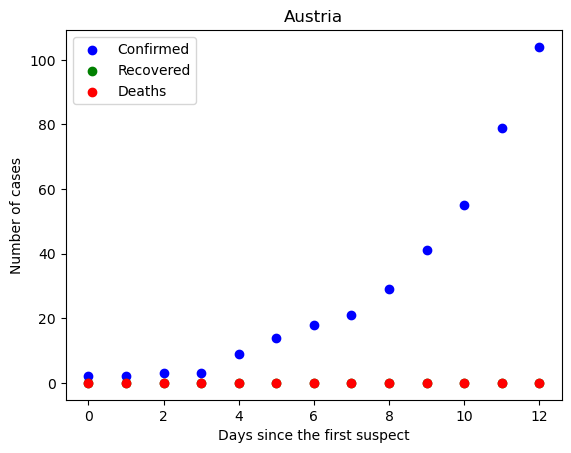

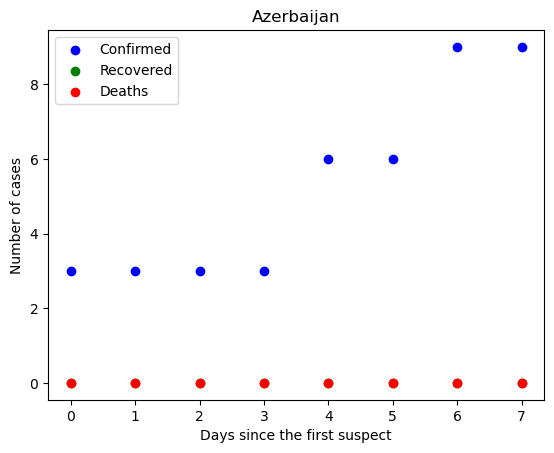

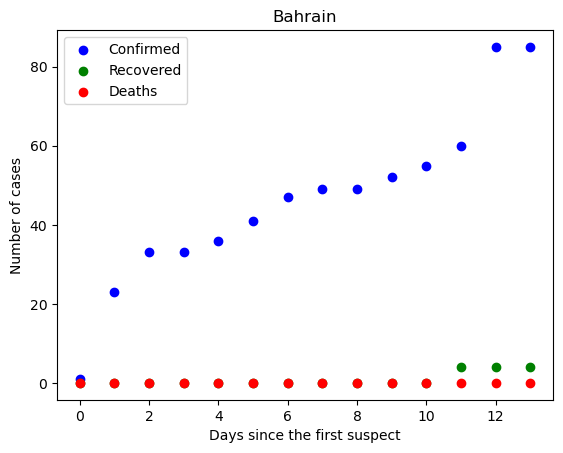

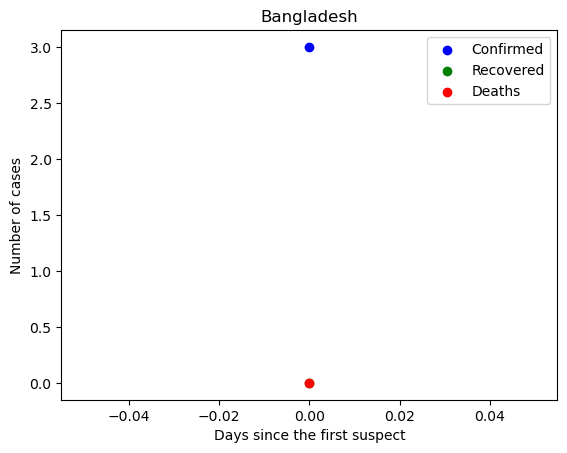

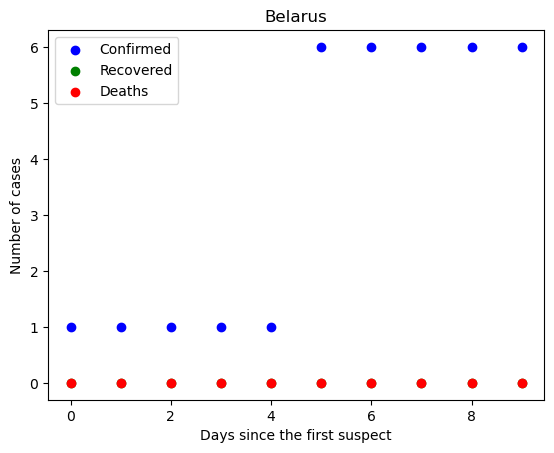

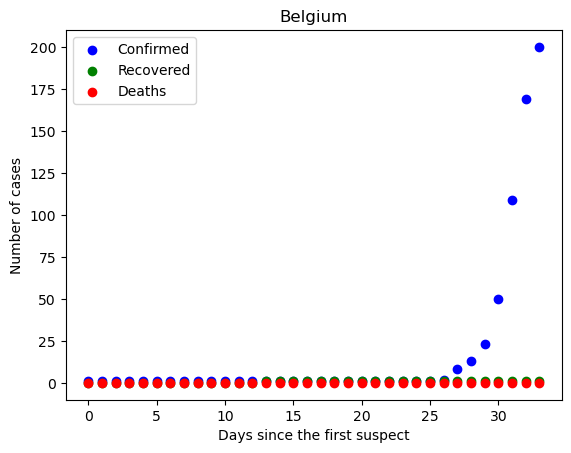

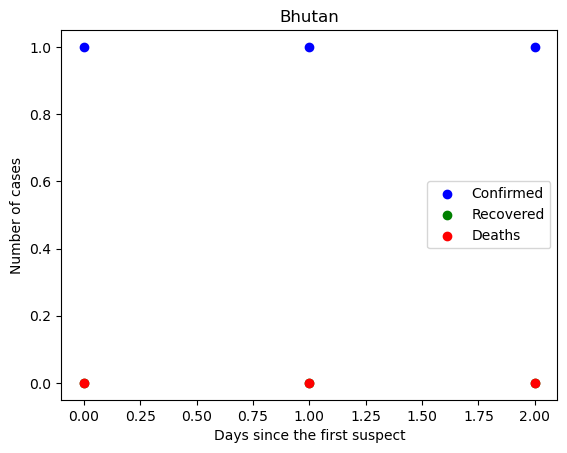

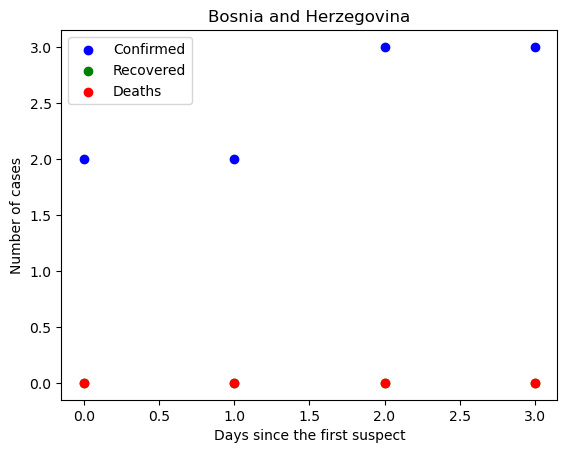

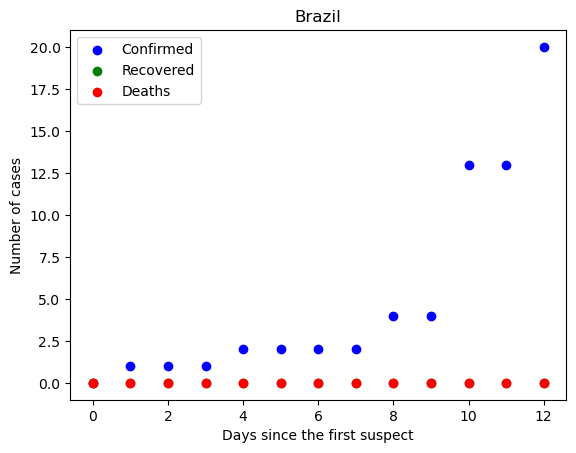

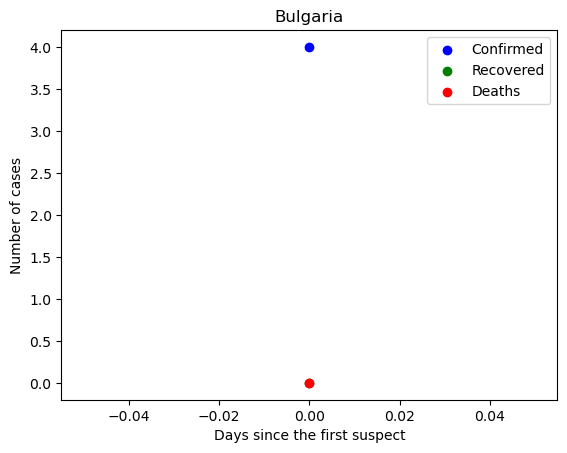

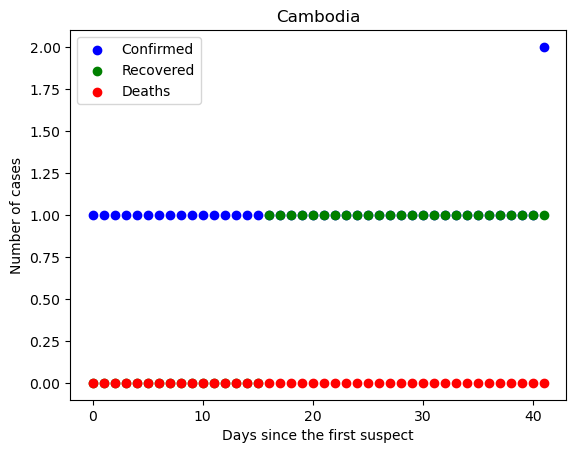

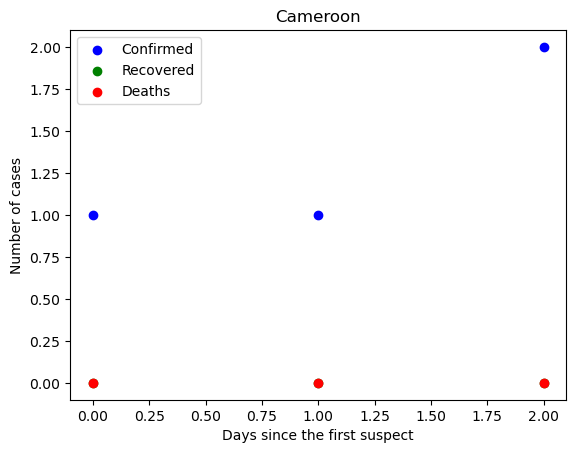

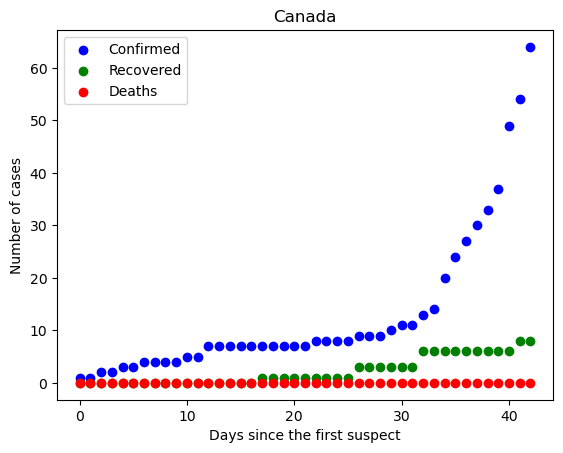

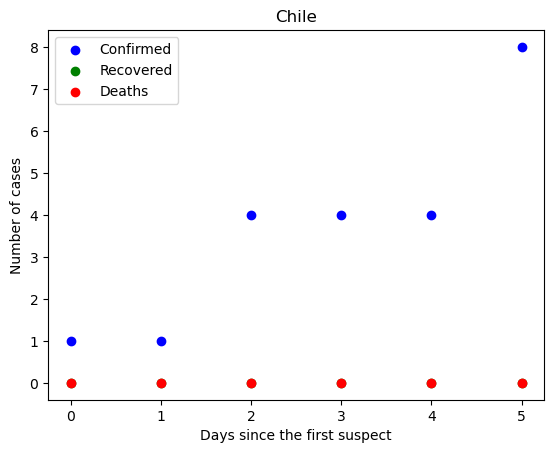

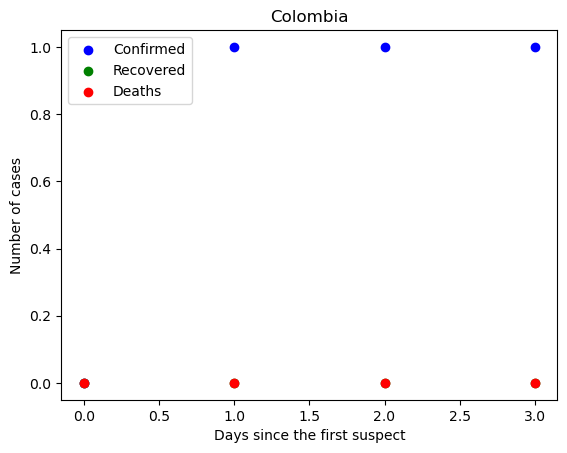

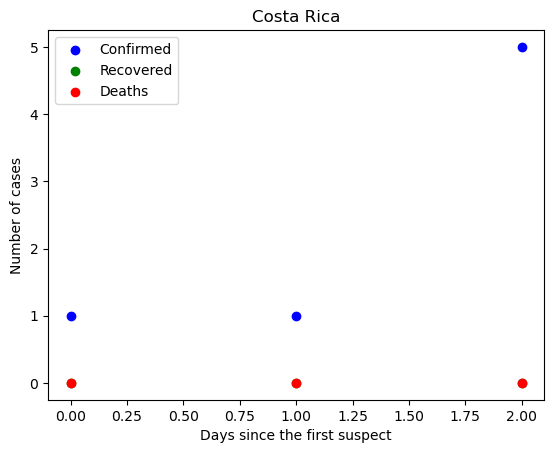

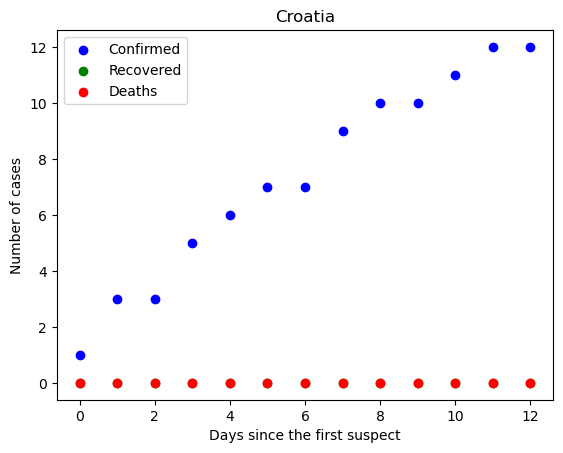

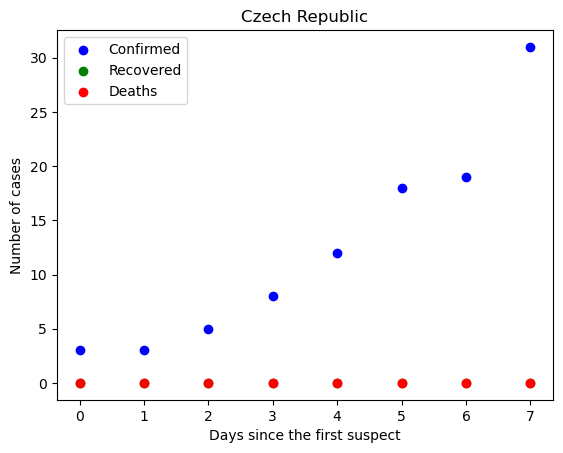

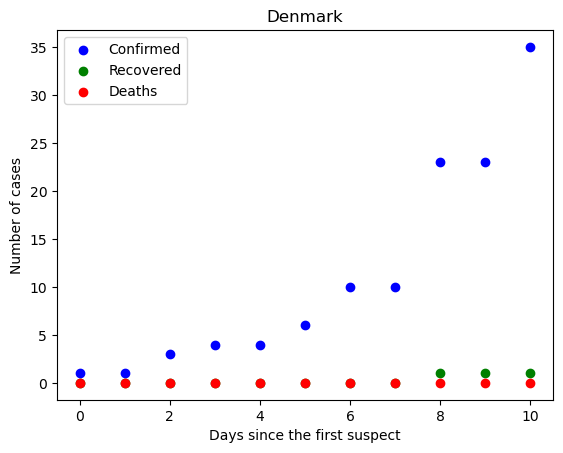

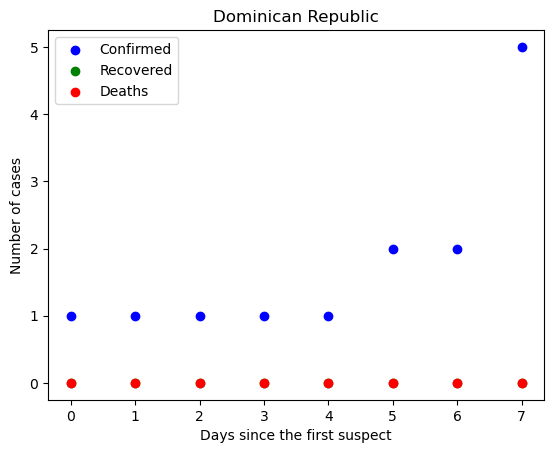

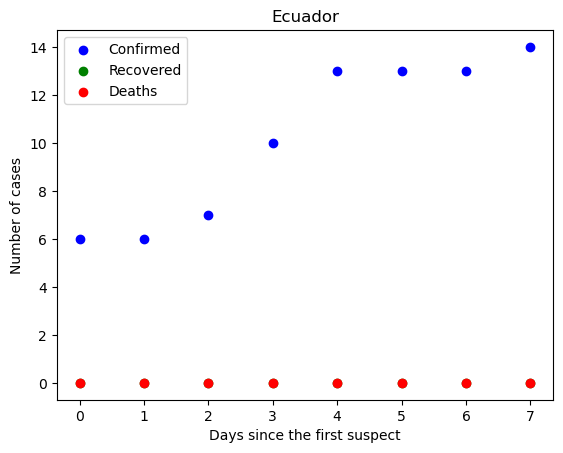

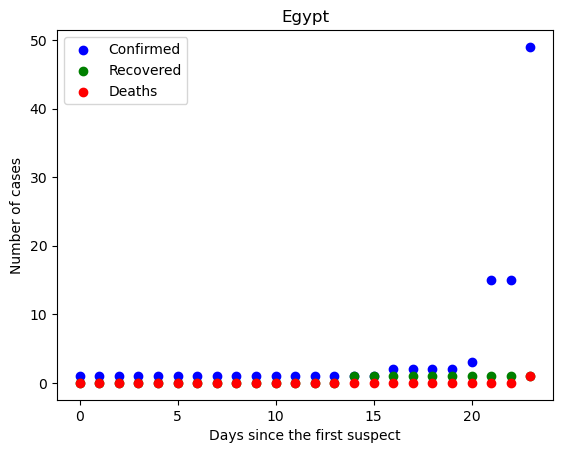

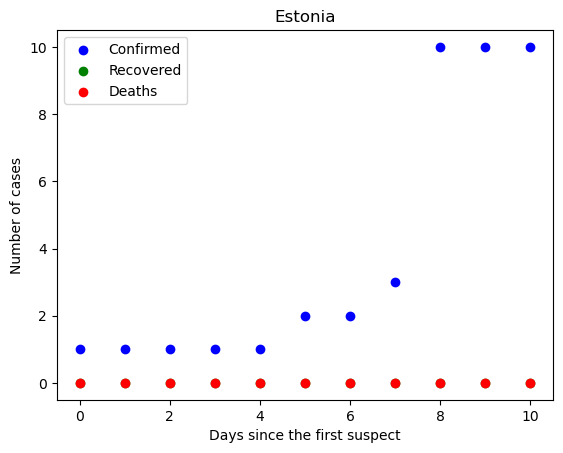

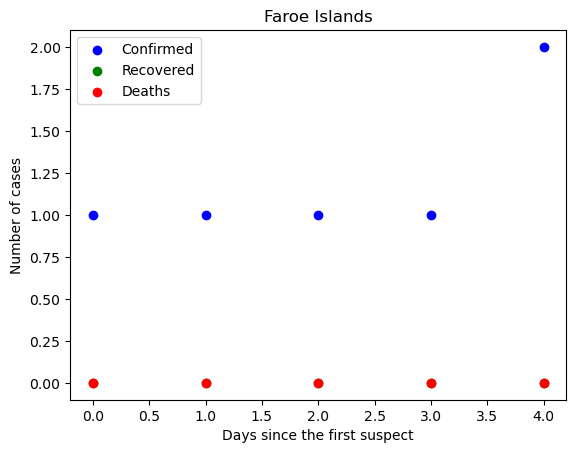

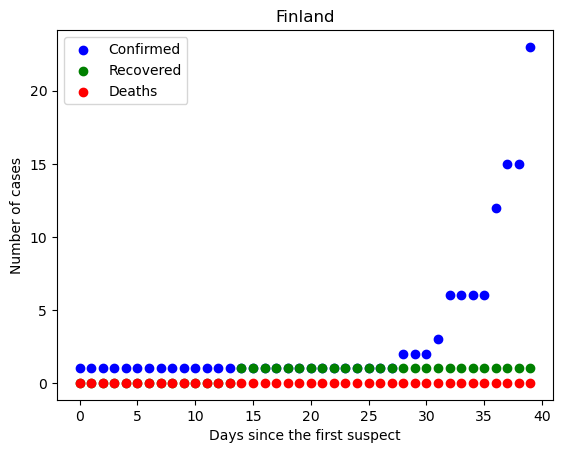

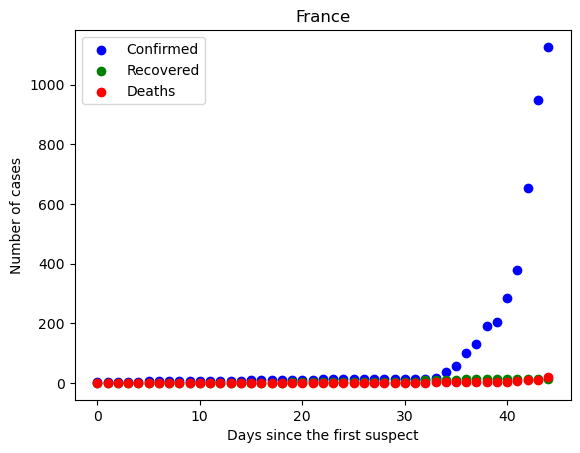

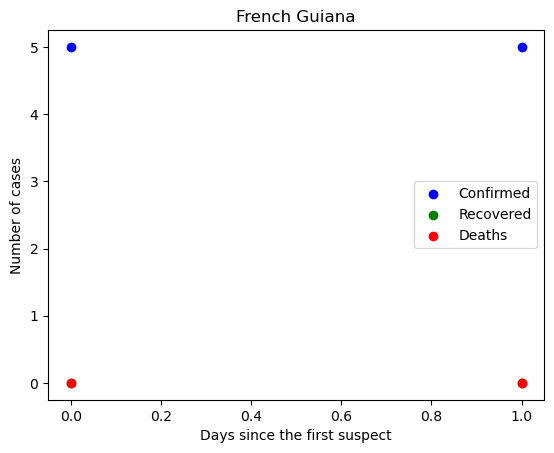

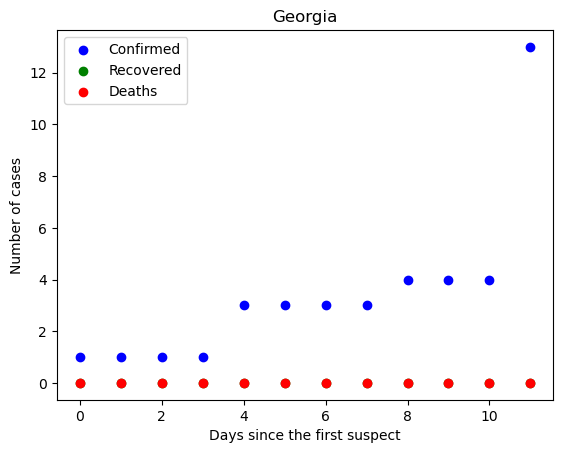

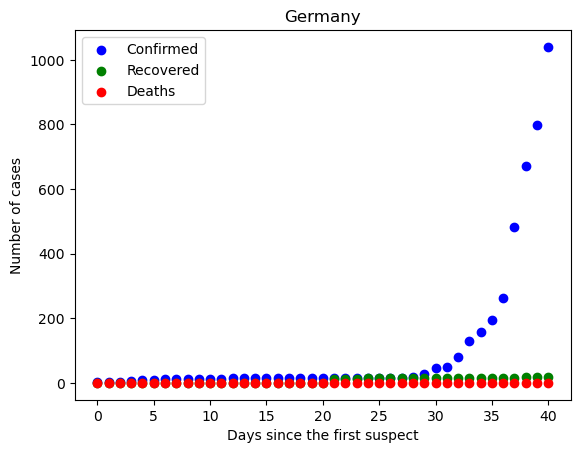

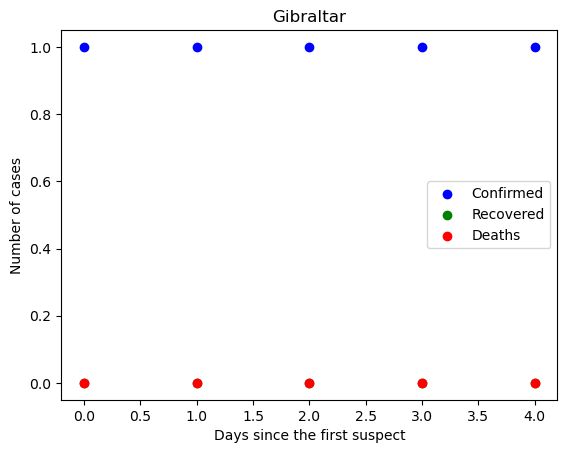

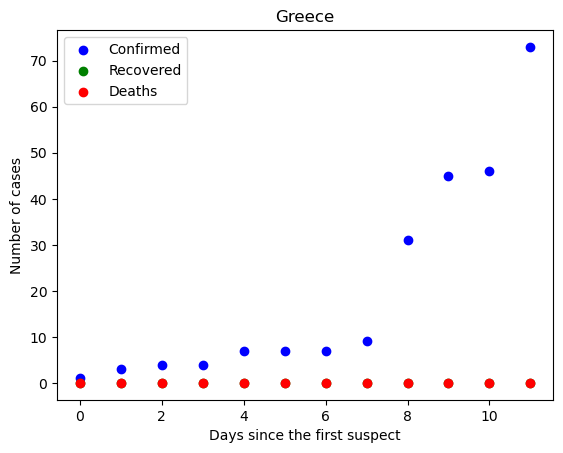

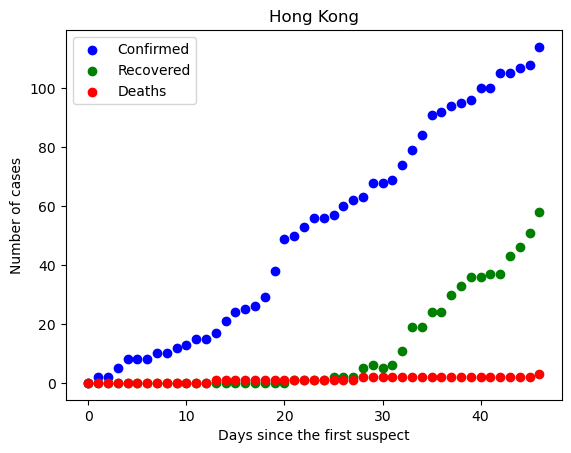

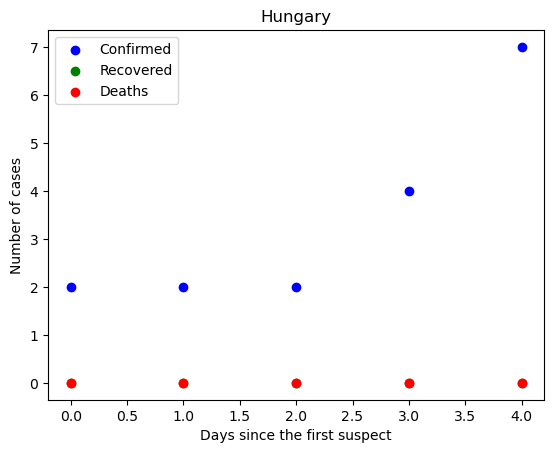

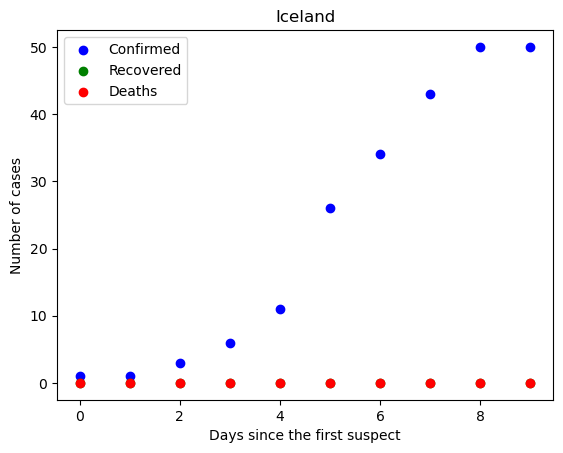

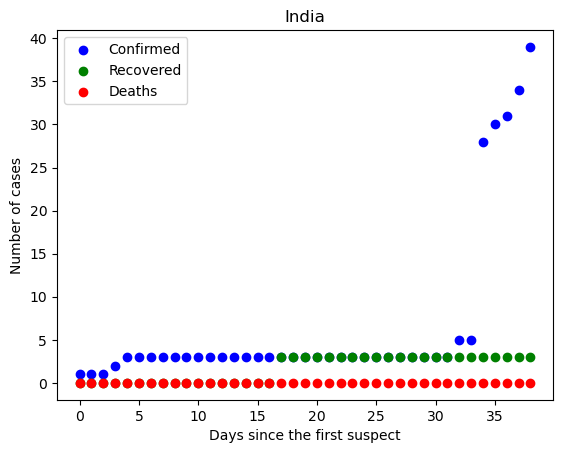

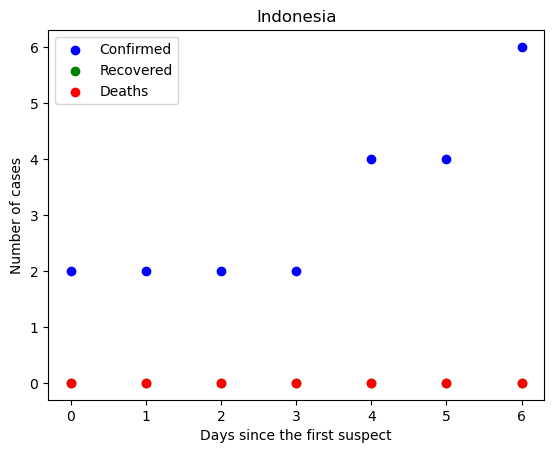

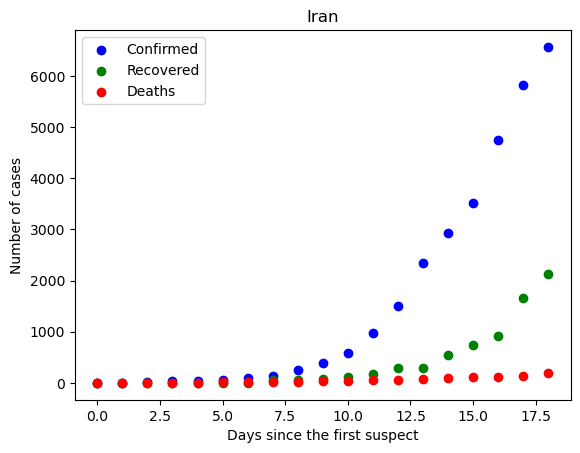

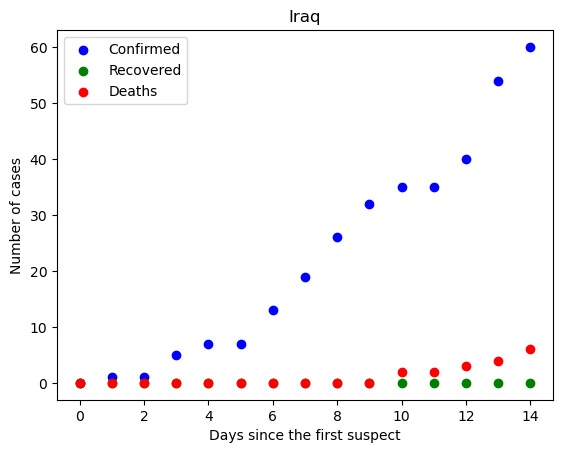

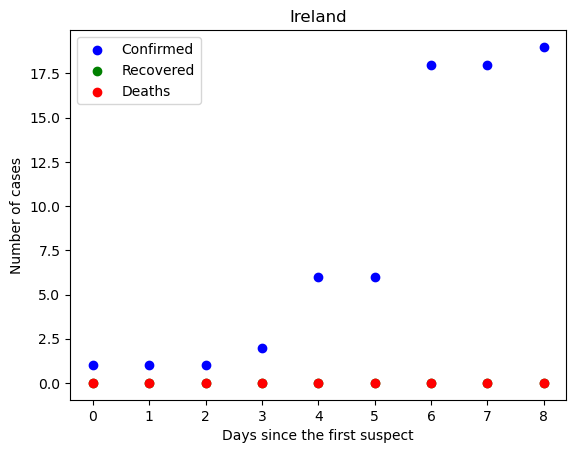

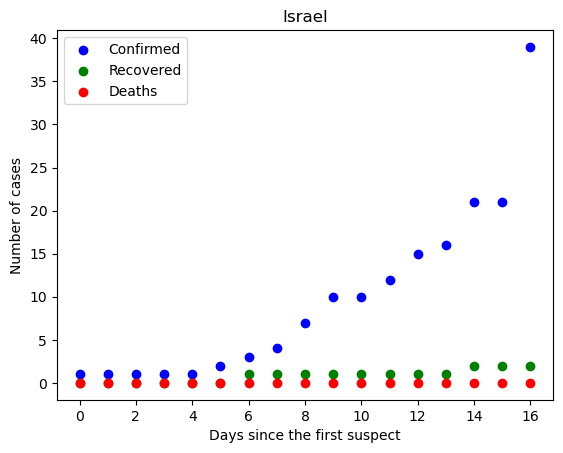

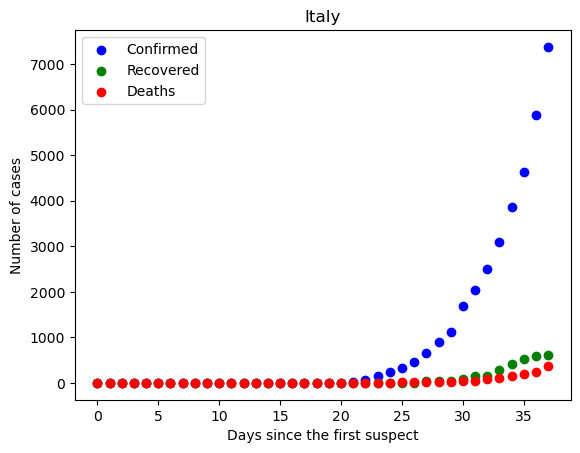

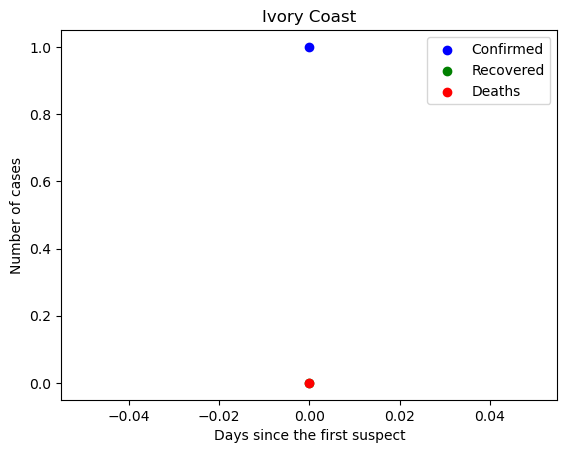

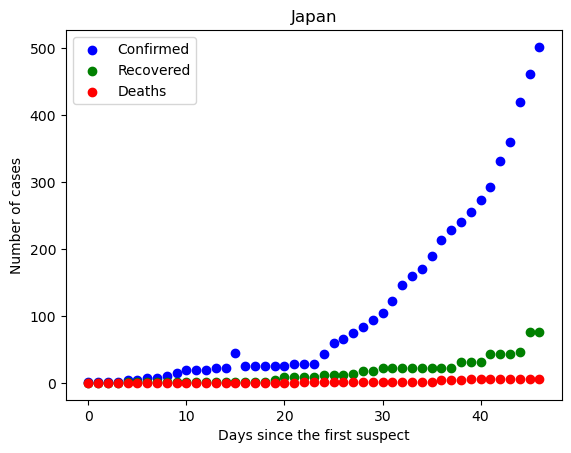

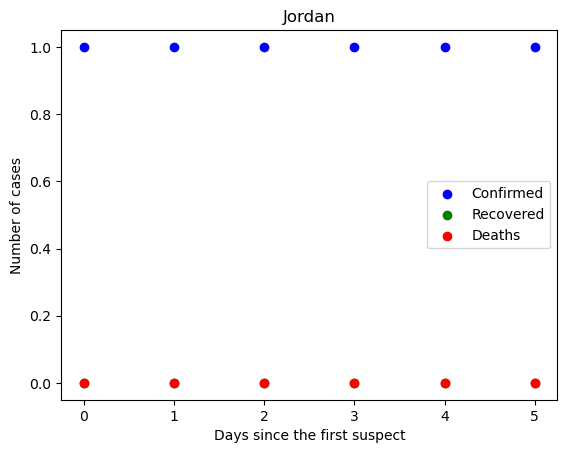

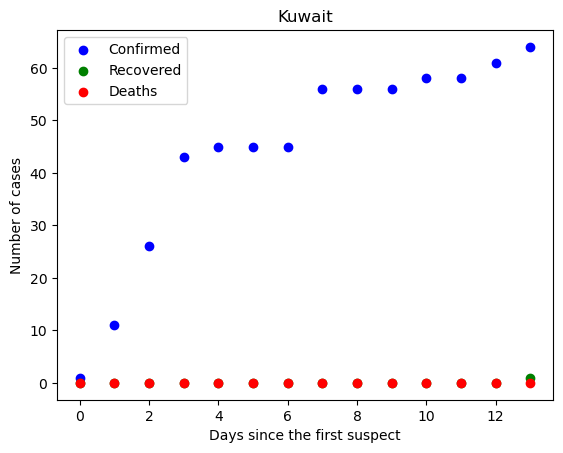

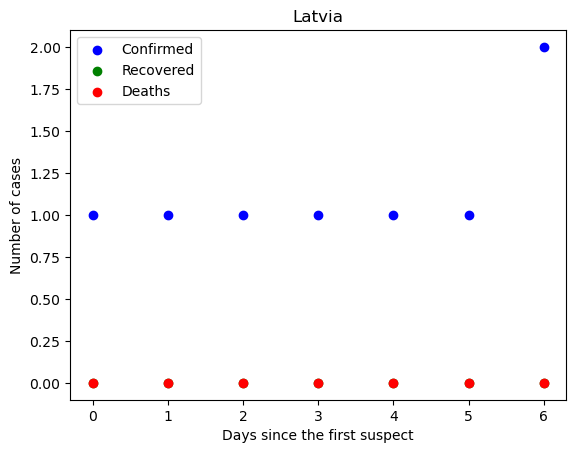

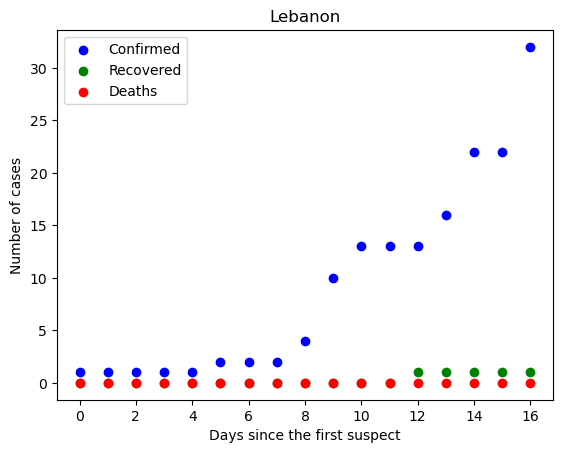

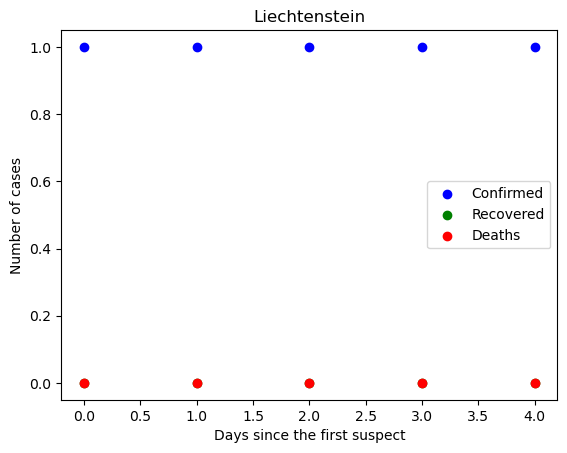

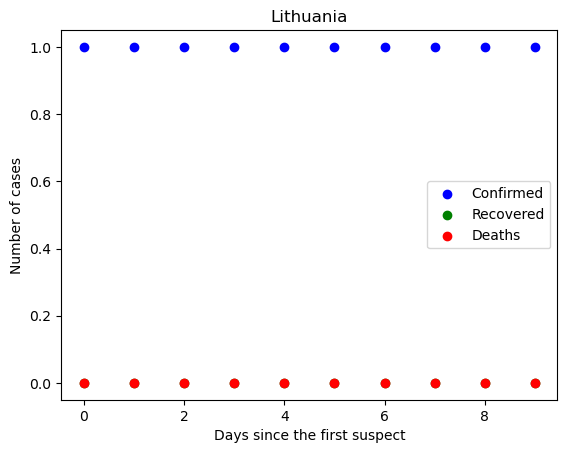

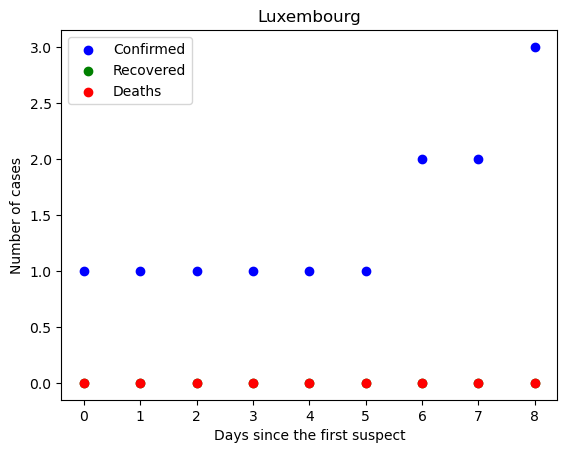

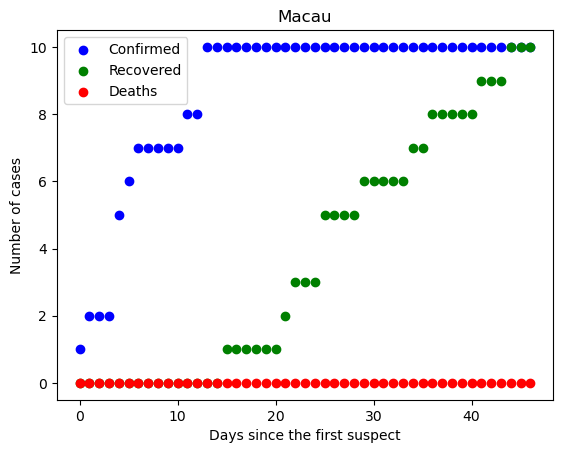

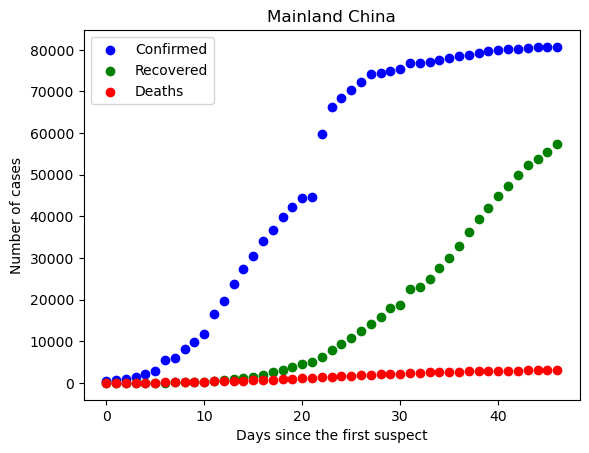

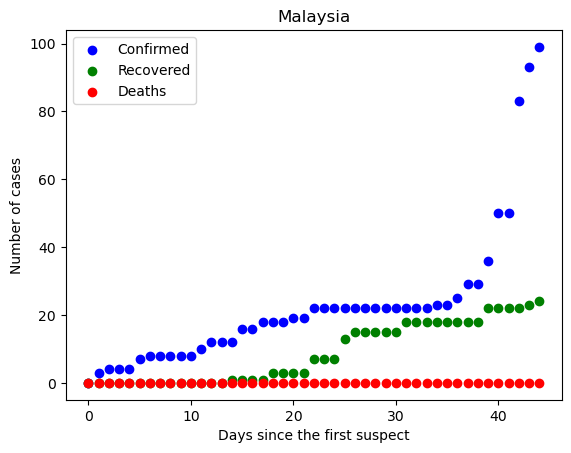

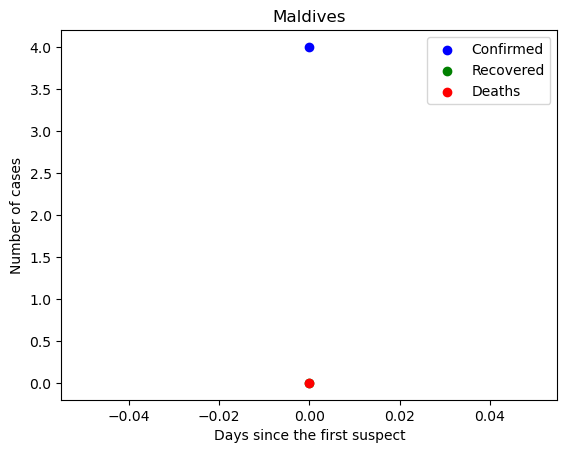

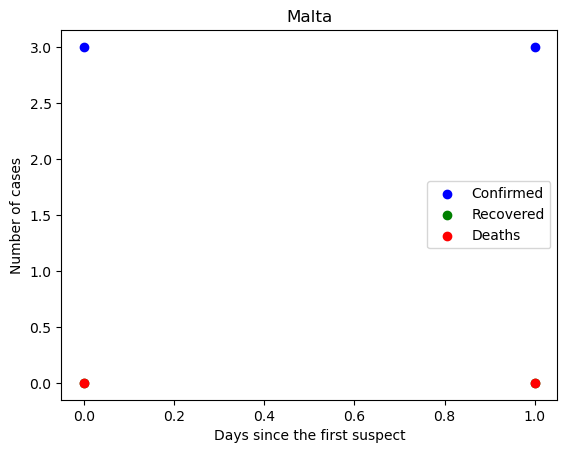

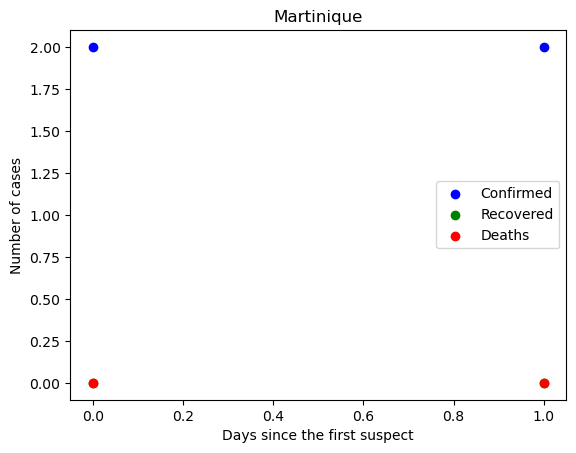

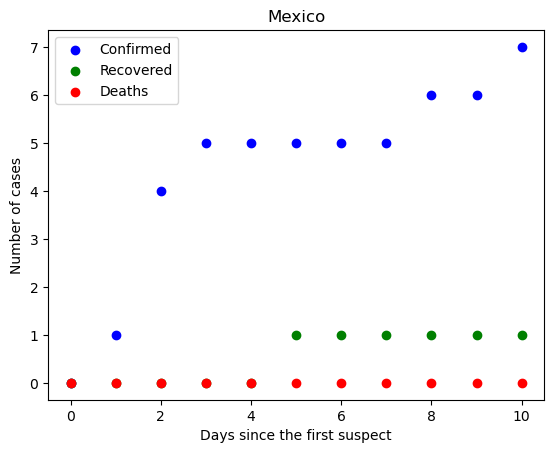

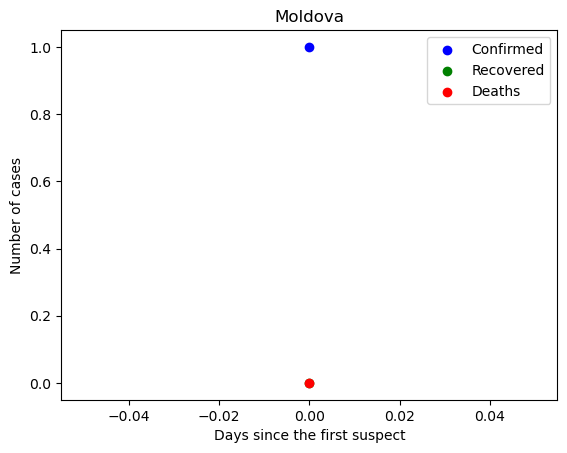

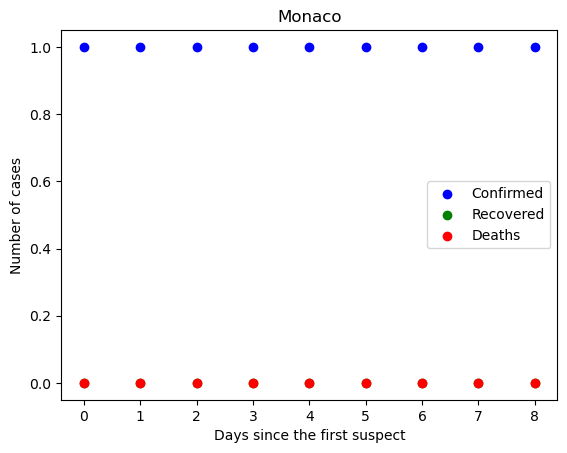

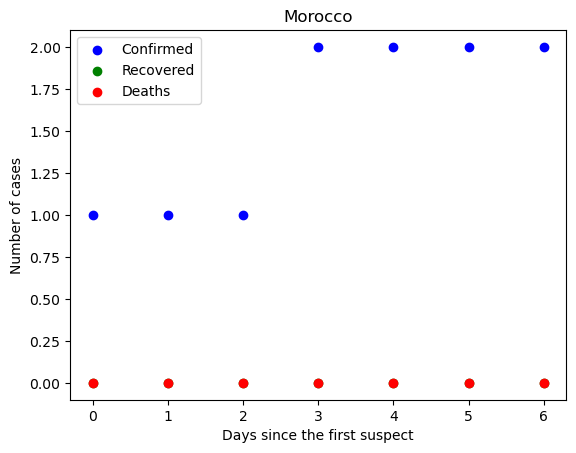

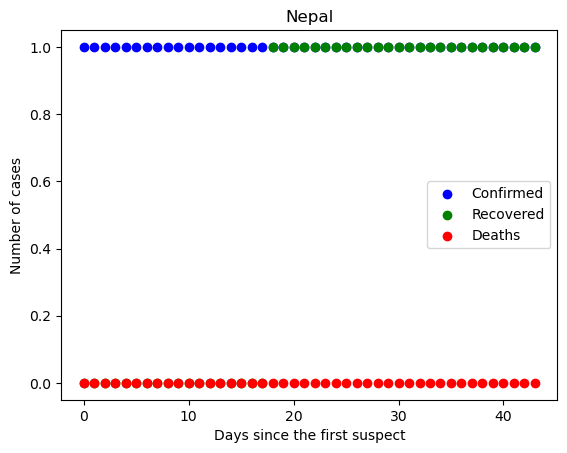

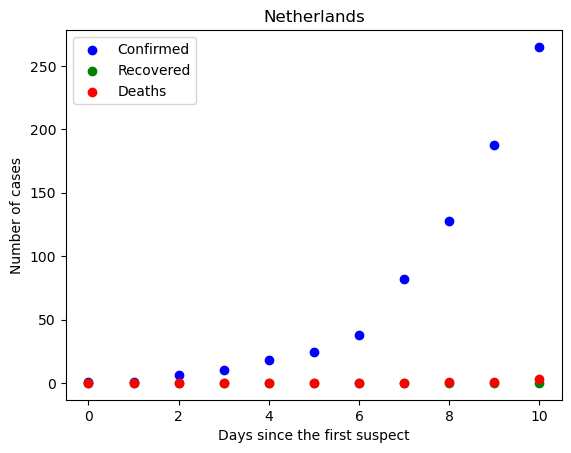

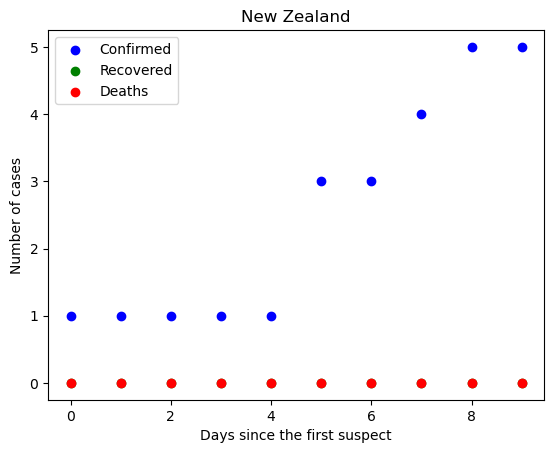

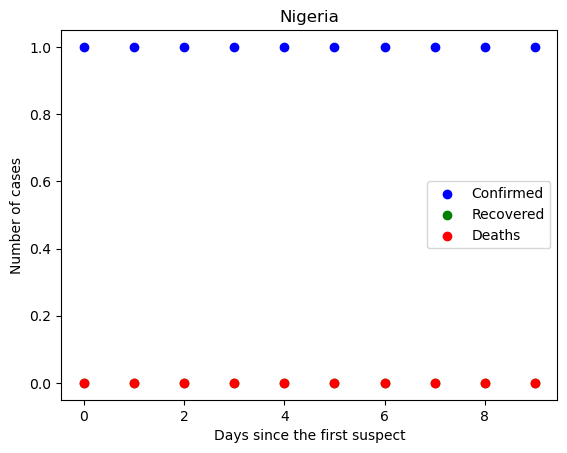

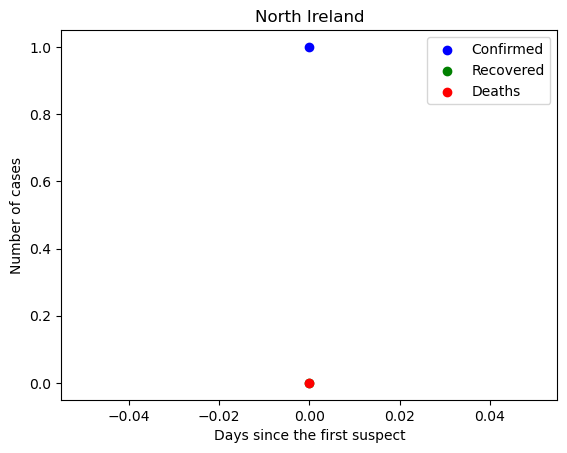

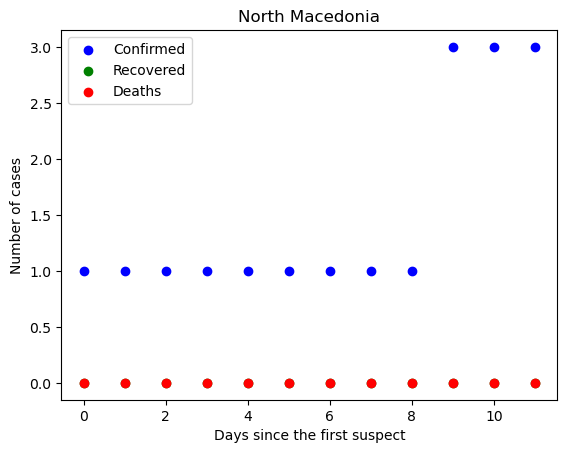

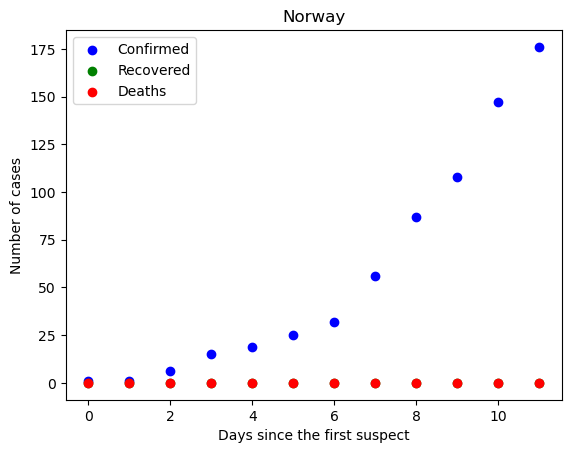

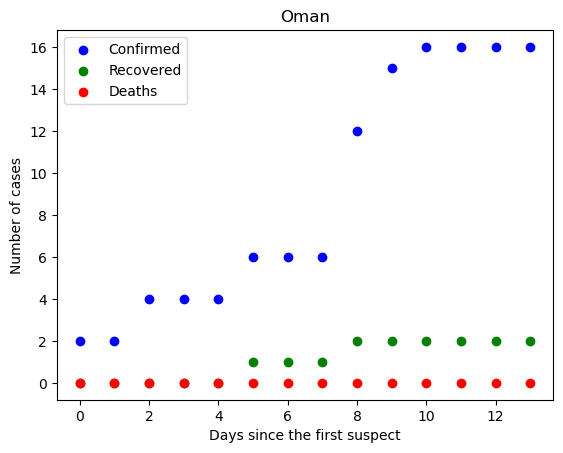

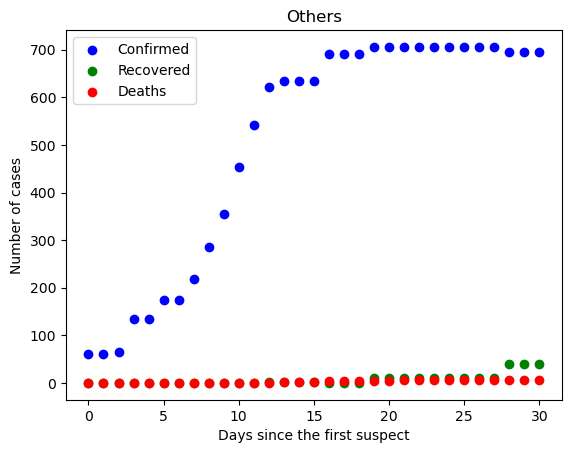

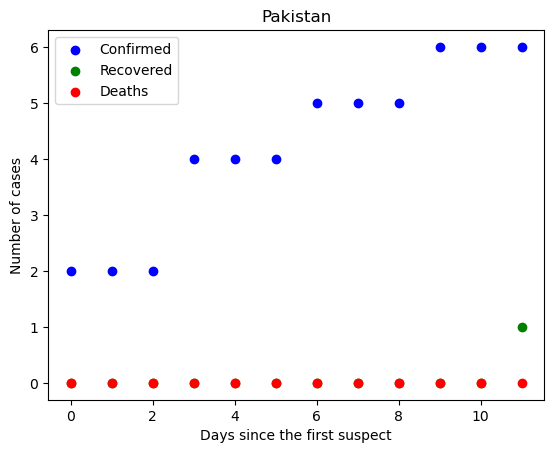

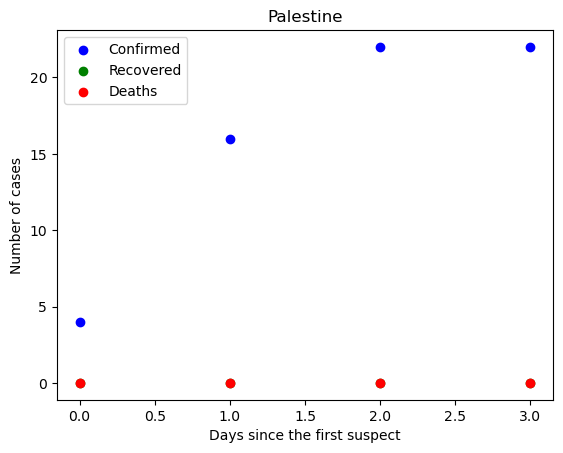

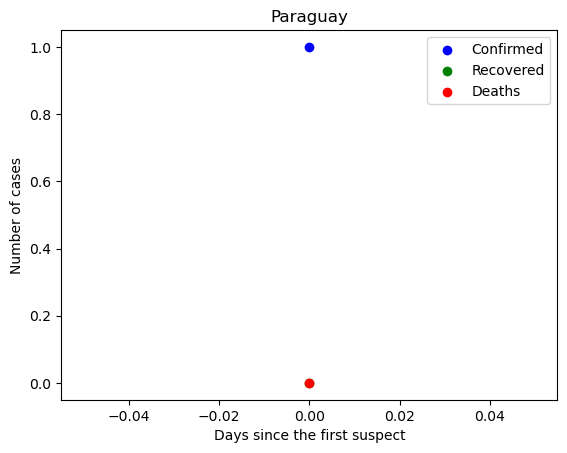

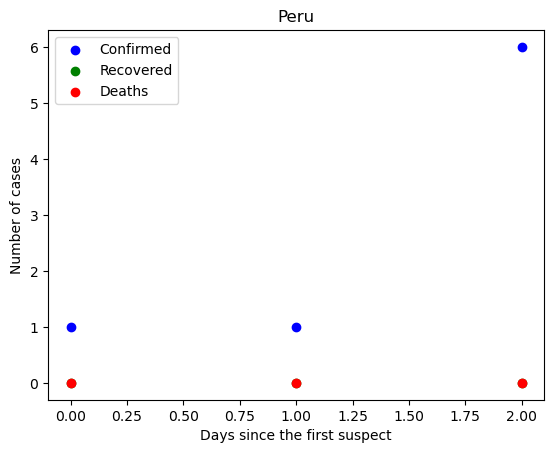

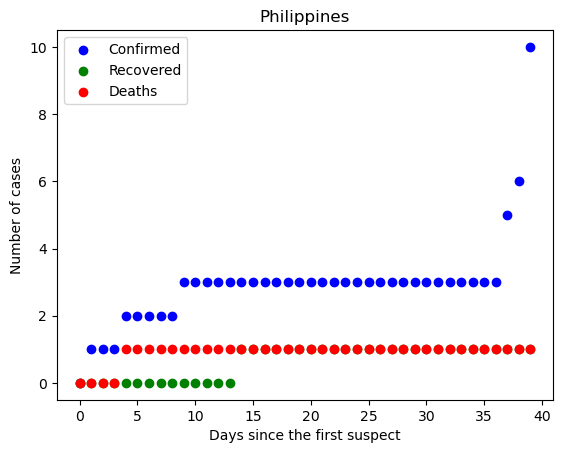

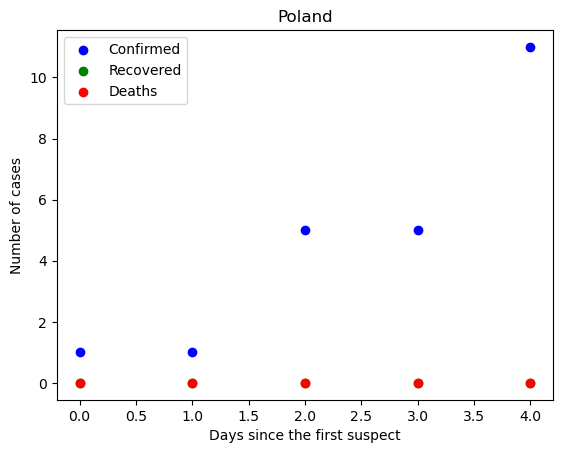

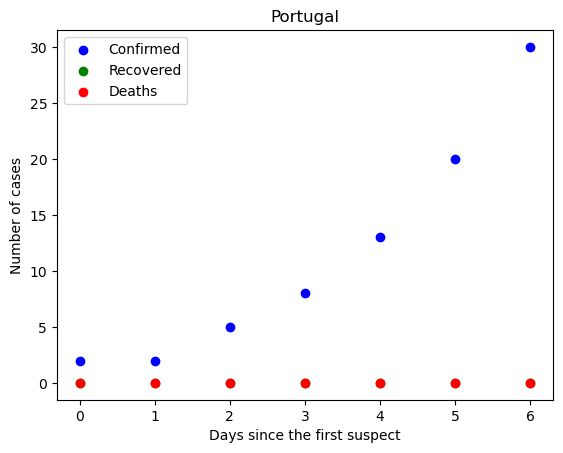

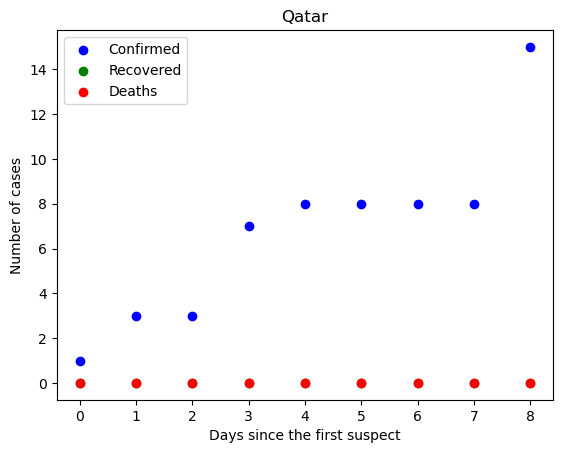

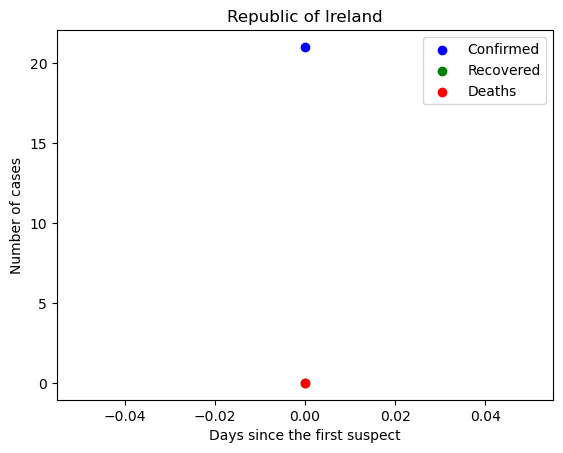

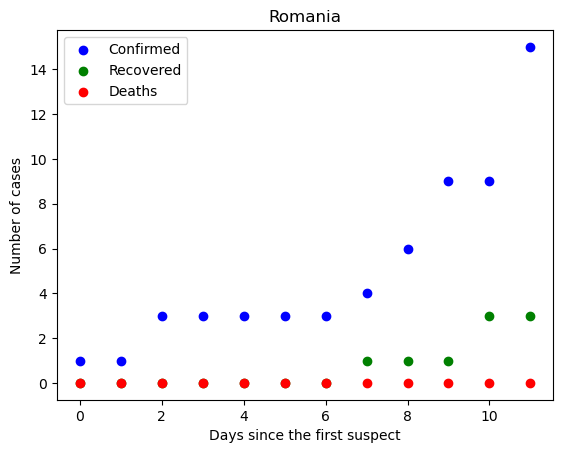

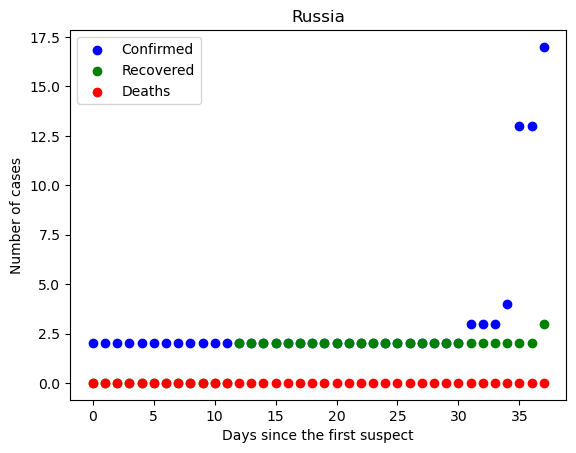

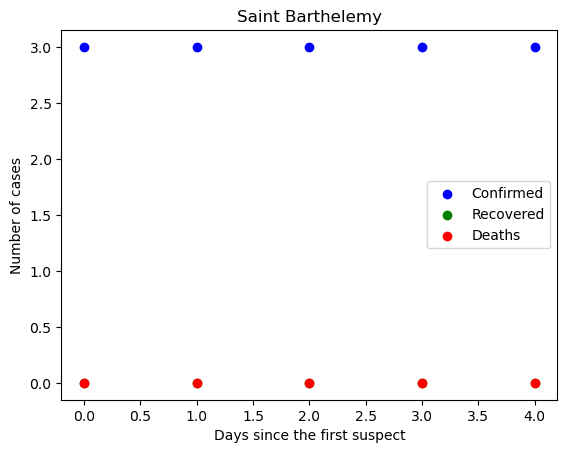

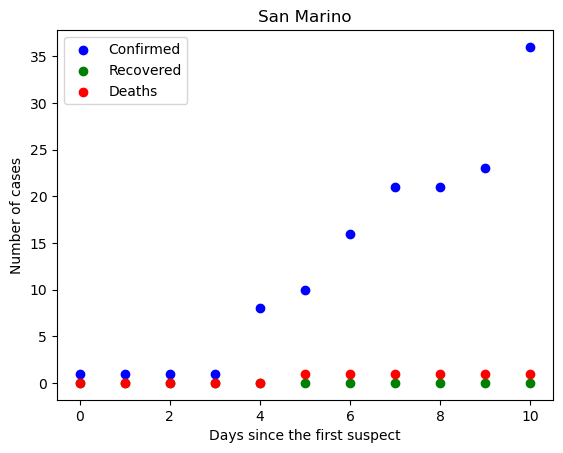

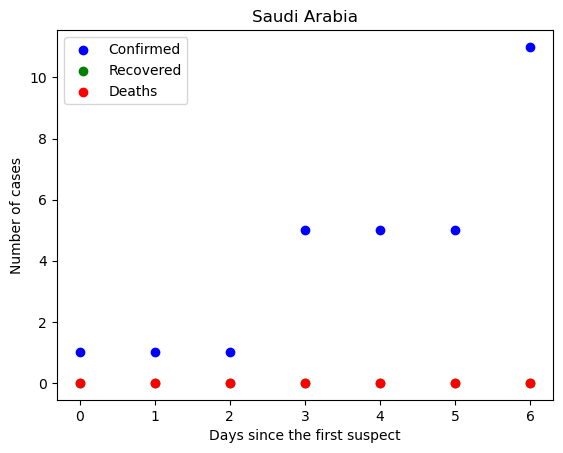

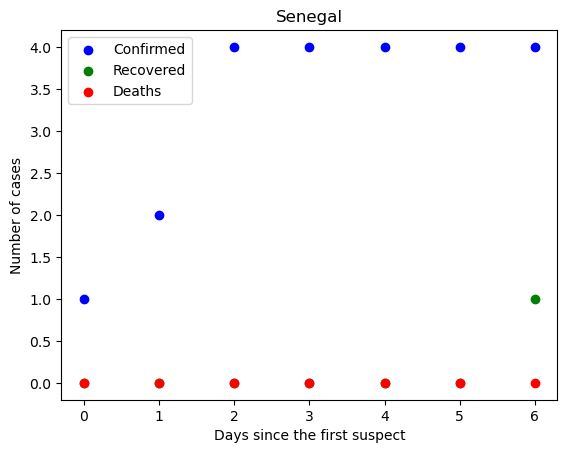

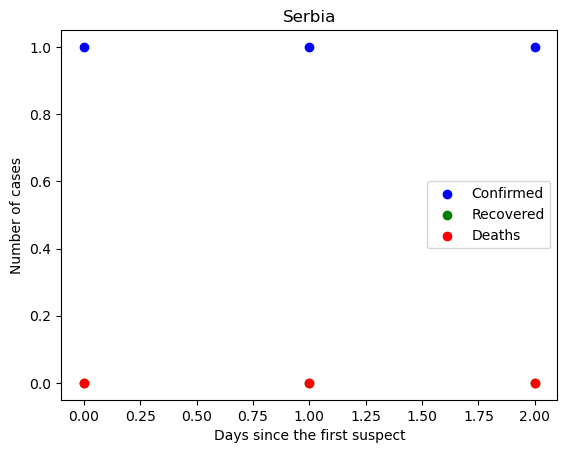

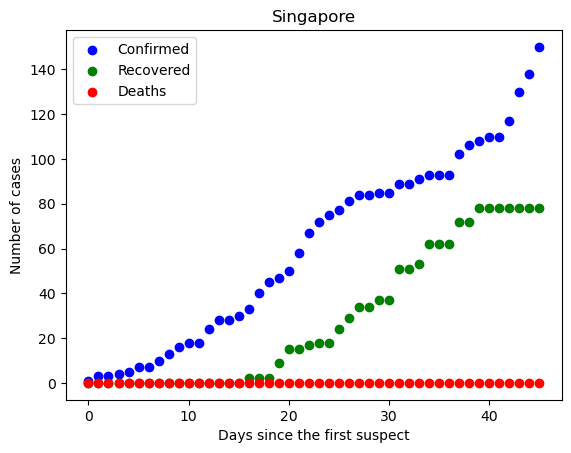

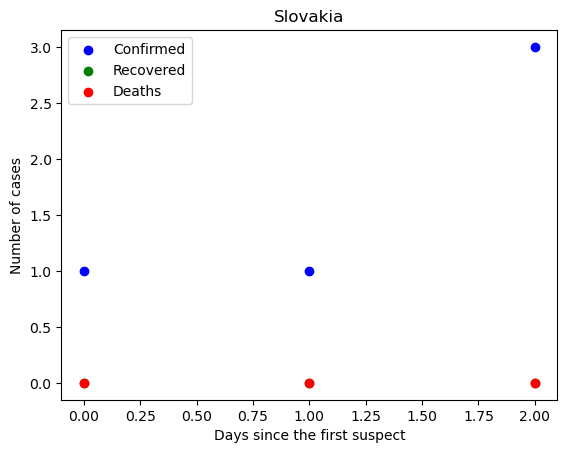

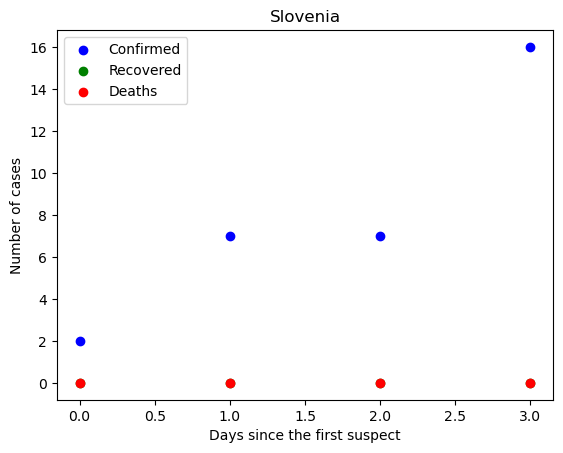

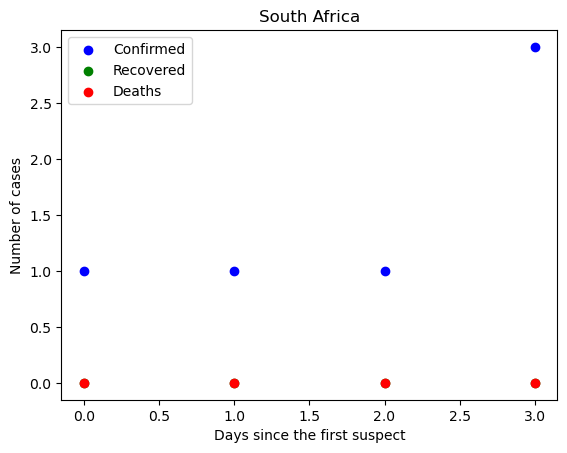

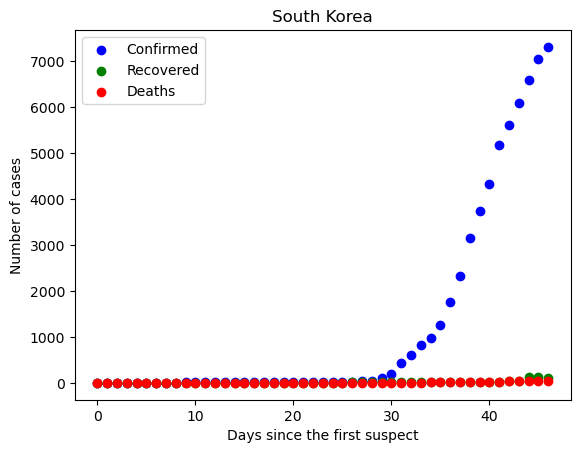

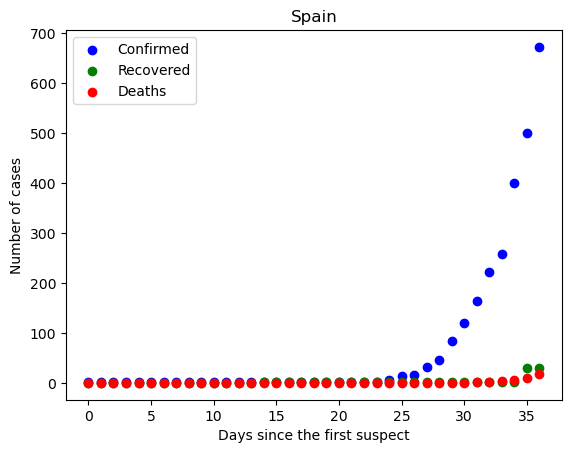

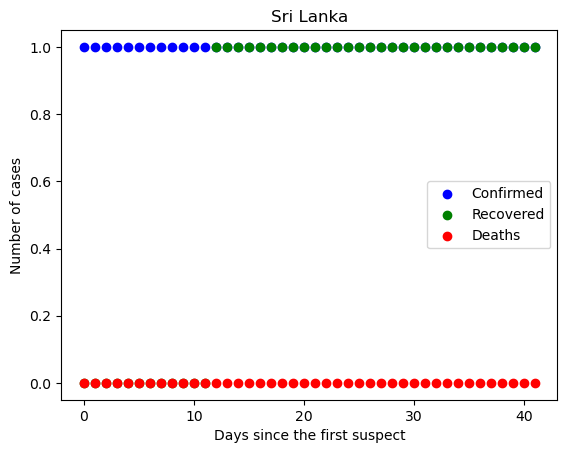

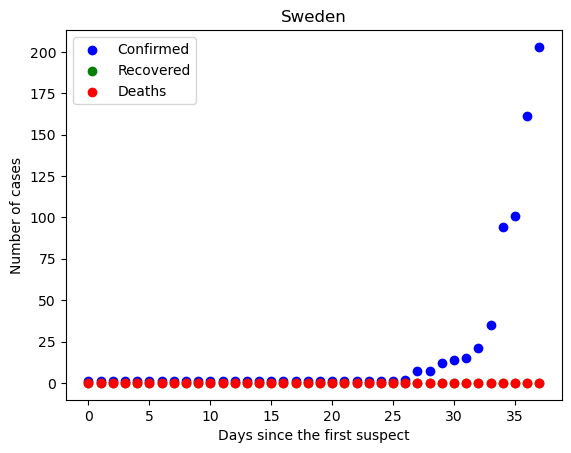

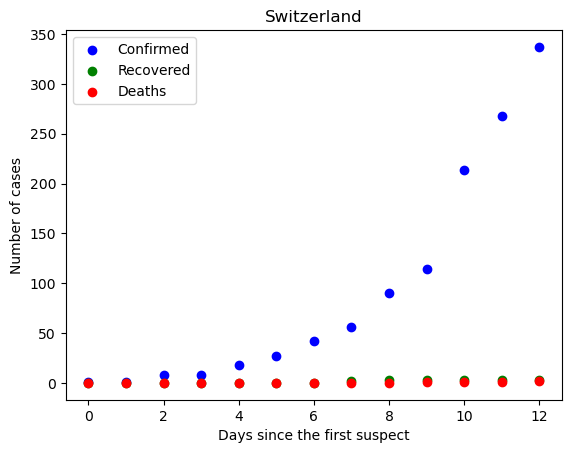

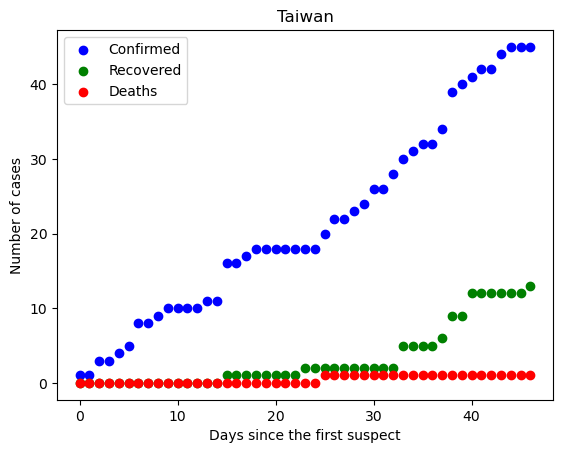

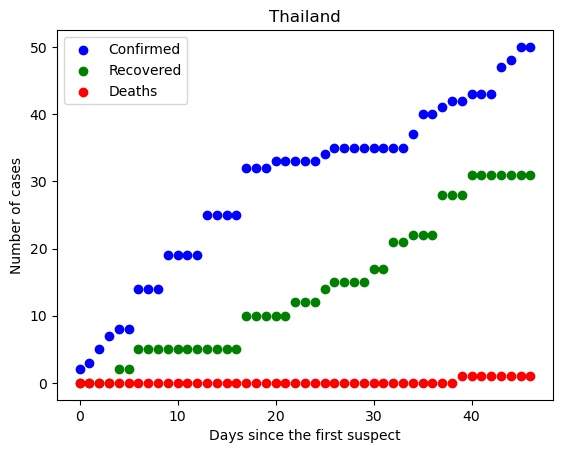

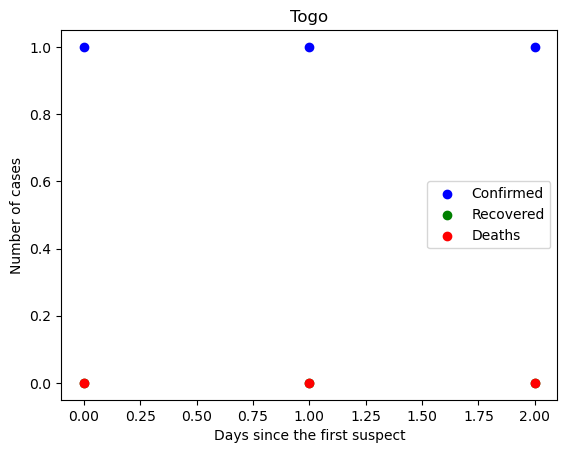

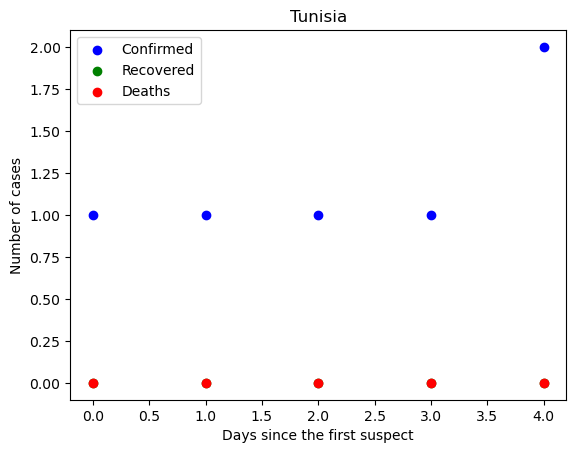

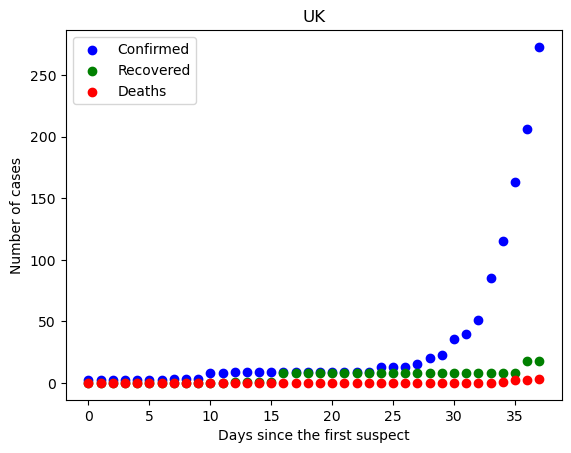

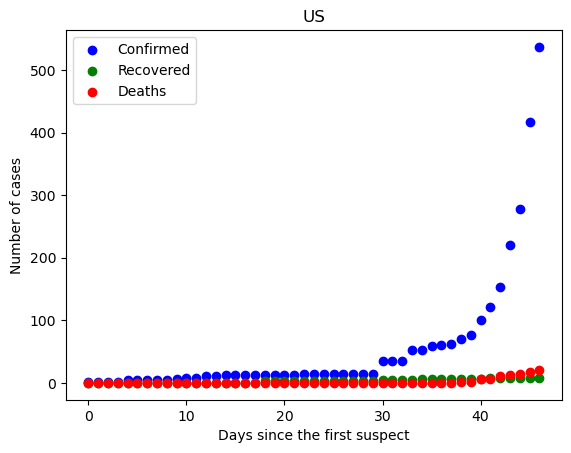

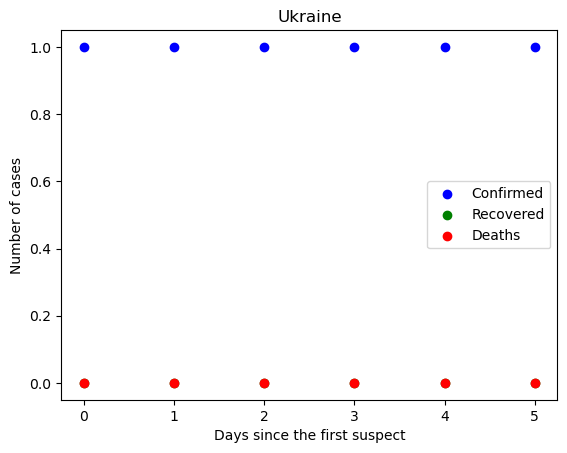

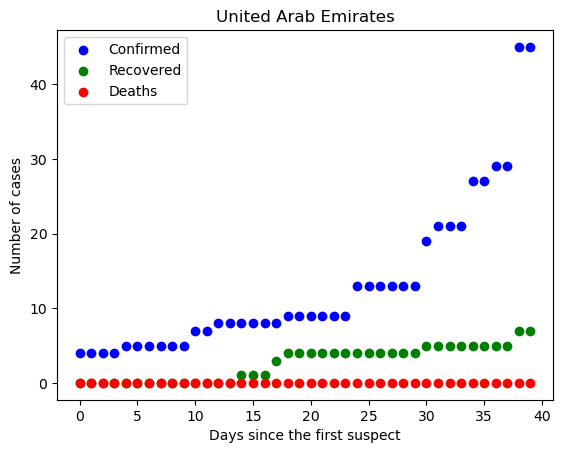

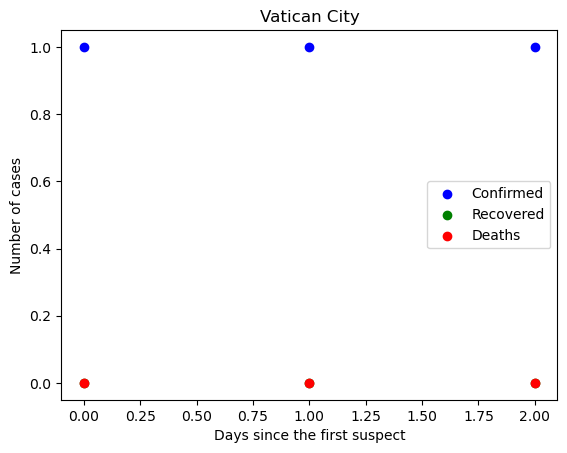

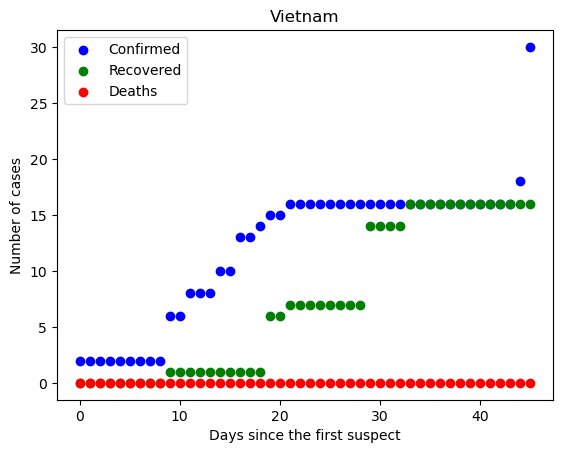

In [20]:
171
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()   

In [22]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

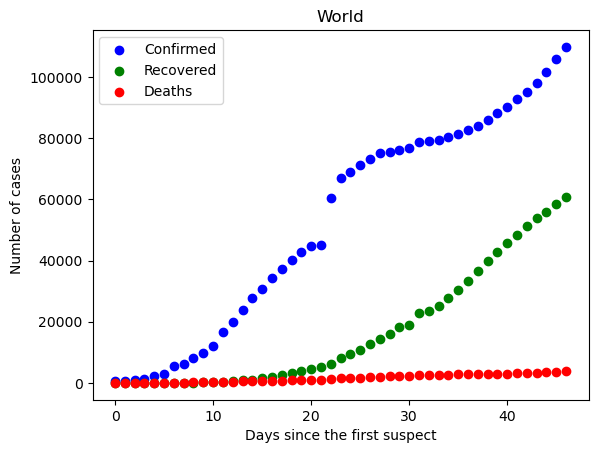

In [23]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()